In [2]:
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
print('NetworkX version: {}'.format(nx.__version__))

NetworkX version: 2.3


In [32]:
G = nx.Graph()
G.add_nodes_from(['COVID19_nation','COVID19_Seoul','COVID19_Daegu','Subway','Traffic','Search term frequency','Shopping','Dining','Work','Starbucks','Trip purpose','Trip mode','Perception','Epidemiology','COVID19'])

In [33]:
G.add_edges_from([('COVID19_nation','Epidemiology'), ('COVID19_Seoul','Epidemiology'),('COVID19_Daegu','Epidemiology'), ('Subway','Trip mode'), ('Traffic','Trip mode'),
                 ('Search term frequency','Perception'),('COVID19_nation','Perception'),('COVID19_Seoul','Perception'),('COVID19_Daegu','Perception'),
                 ('Shopping','Trip purpose'),('Dining','Trip purpose'),('Work','Trip purpose'),('Starbucks','Trip purpose'),
                 ('Trip purpose','COVID19'),('Trip mode','COVID19'),('Perception','COVID19'),('Epidemiology','COVID19')])

In [34]:
G.add_nodes_from(['COVID19_nation','COVID19_Seoul','COVID19_Daegu'], classify='Epidemiological data')
G.add_nodes_from(['Subway','Traffic'], classify='Trip mode data')
G.add_nodes_from(['Search term frequency'], classify='Perception data')
G.add_nodes_from(['Shopping','Dining','Work','Starbucks'], classify='Trip purpose')

In [35]:
G.node['COVID19_nation']['classify']

'Epidemiological data'

In [36]:
colorcode = {}
colorcode['Epidemiological data'] = 'red'
colorcode['Trip mode data'] = 'green'
colorcode['Perception data'] = 'orange'
colorcode['Trip purpose'] = 'blue'

In [37]:
node_size_ = [150, 70, 70, 1350, 1610, 60, 1930, 1960, 2000, 2010]

In [38]:
nodelist_ =['COVID19_nation','COVID19_Seoul','COVID19_Daegu','Subway','Traffic','Search term frequency','Shopping','Dining','Work','Starbucks','Trip purpose','Trip mode','Perception','Epidemiology','COVID19']
edgelist_ = [('COVID19_nation','Epidemiology'), ('COVID19_Seoul','Epidemiology'),('COVID19_Daegu','Epidemiology'), ('Subway','Trip mode'), ('Traffic','Trip mode'),
                 ('Search term frequency','Perception'),('COVID19_nation','Perception'),('COVID19_Seoul','Perception'),('COVID19_Daegu','Perception'),
                 ('Shopping','Trip purpose'),('Dining','Trip purpose'),('Work','Trip purpose'),('Starbucks','Trip purpose'),
                 ('Trip purpose','COVID19'),('Trip mode','COVID19'),('Perception','COVID19'),('Epidemiology','COVID19')]

In [49]:
other_nodes

{'COVID19_Daegu',
 'COVID19_Seoul',
 'COVID19_nation',
 'Dining',
 'Search term frequency',
 'Shopping',
 'Starbucks',
 'Subway',
 'Traffic',
 'Work'}

In [62]:
other_nodes

{'COVID19_Daegu',
 'COVID19_Seoul',
 'COVID19_nation',
 'Dining',
 'Search term frequency',
 'Shopping',
 'Starbucks',
 'Subway',
 'Traffic',
 'Work'}

In [71]:
node_size = {}
node_size['COVID19_Daegu'] = 70
node_size['COVID19_Seoul'] = 70
node_size['COVID19_nation'] = 150
node_size['Search term frequency'] = 60
node_size['Subway'] = 1350
node_size['Traffic'] = 1610
node_size['Starbucks'] = 2010
node_size['Shopping'] = 1930
node_size['Dining'] = 1960
node_size['Work'] = 2000

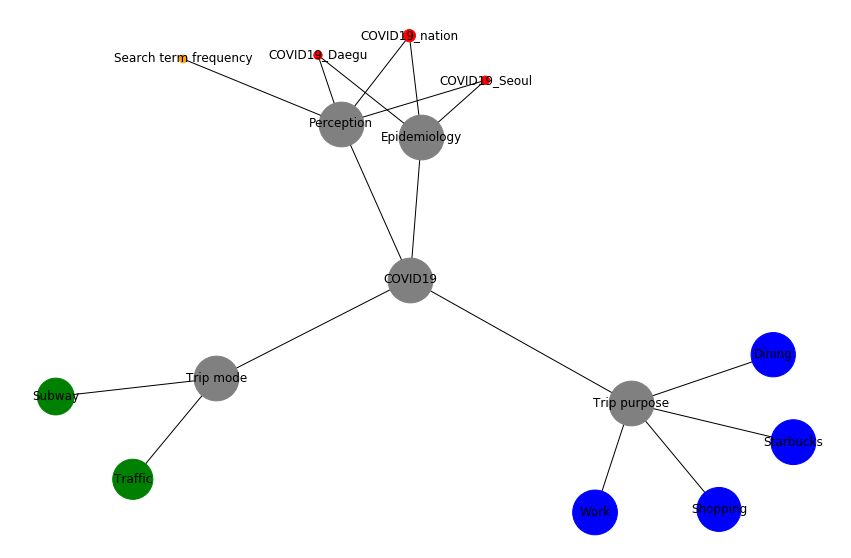

In [74]:
plt.figure(figsize=(15,10))
pos_fr = nx.spring_layout(G)
class_nodes = {'Epidemiology', 'Perception', 'Trip purpose', 'Trip mode', 'COVID19'}
other_nodes = set(G) - class_nodes
nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=class_nodes, node_size=2000, node_color='grey')
nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=node_size.keys(), node_size=[v for v in node_size.values()], node_color=[colorcode[G.node[n]['classify']] for n in node_size.keys()])
nx.draw_networkx_edges(G, pos=pos_fr, edgelist=set(G.edges()))
nx.draw_networkx_labels(G, pos=pos_fr, labels={n: n for n in nodelist_})
ax = plt.gca()
ax.set_axis_off()